## Submetric: Best Playground

In [1]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
playgrounds = pd.read_csv("playground_data.csv")

# how many playgrounds are in each neighborhood?
# more entries = more playgrounds = better
playgrounds = pd.DataFrame(playgrounds['neighborhood'].value_counts())
playgrounds = playgrounds.rename(columns = {'neighborhood':'num_playgrounds'})
playgrounds

,num_playgrounds
Squirrel Hill South,32
East Liberty,26
Beechview,21
Allegheny Center,15
South Side Slopes,14
...,...
Westwood,2
Central Oakland,2
Esplen,2
West Oakland,1


## Analyze Data

In [4]:
# Classify neighborhoods as:
# Excellent = > 25 playgrounds
# Good = > 15 playgrounds
# Okay = > 5 playgrounds
# Poor = <= 5 playgrounds
def categorize(row):
    if row['num_playgrounds'] >= 25:
        return 'excellent'
    if row['num_playgrounds'] >= 15:
        return 'good'
    if row['num_playgrounds'] >= 5:
        return 'okay'
    if row['num_playgrounds'] < 5:
        return 'poor'

playgrounds['categorization'] = playgrounds.apply(lambda row: categorize(row), axis=1)
playgrounds

,num_playgrounds,categorization
Squirrel Hill South,32,excellent
East Liberty,26,excellent
Beechview,21,good
Allegheny Center,15,good
South Side Slopes,14,okay
...,...,...
Westwood,2,poor
Central Oakland,2,poor
Esplen,2,poor
West Oakland,1,poor


## Plot

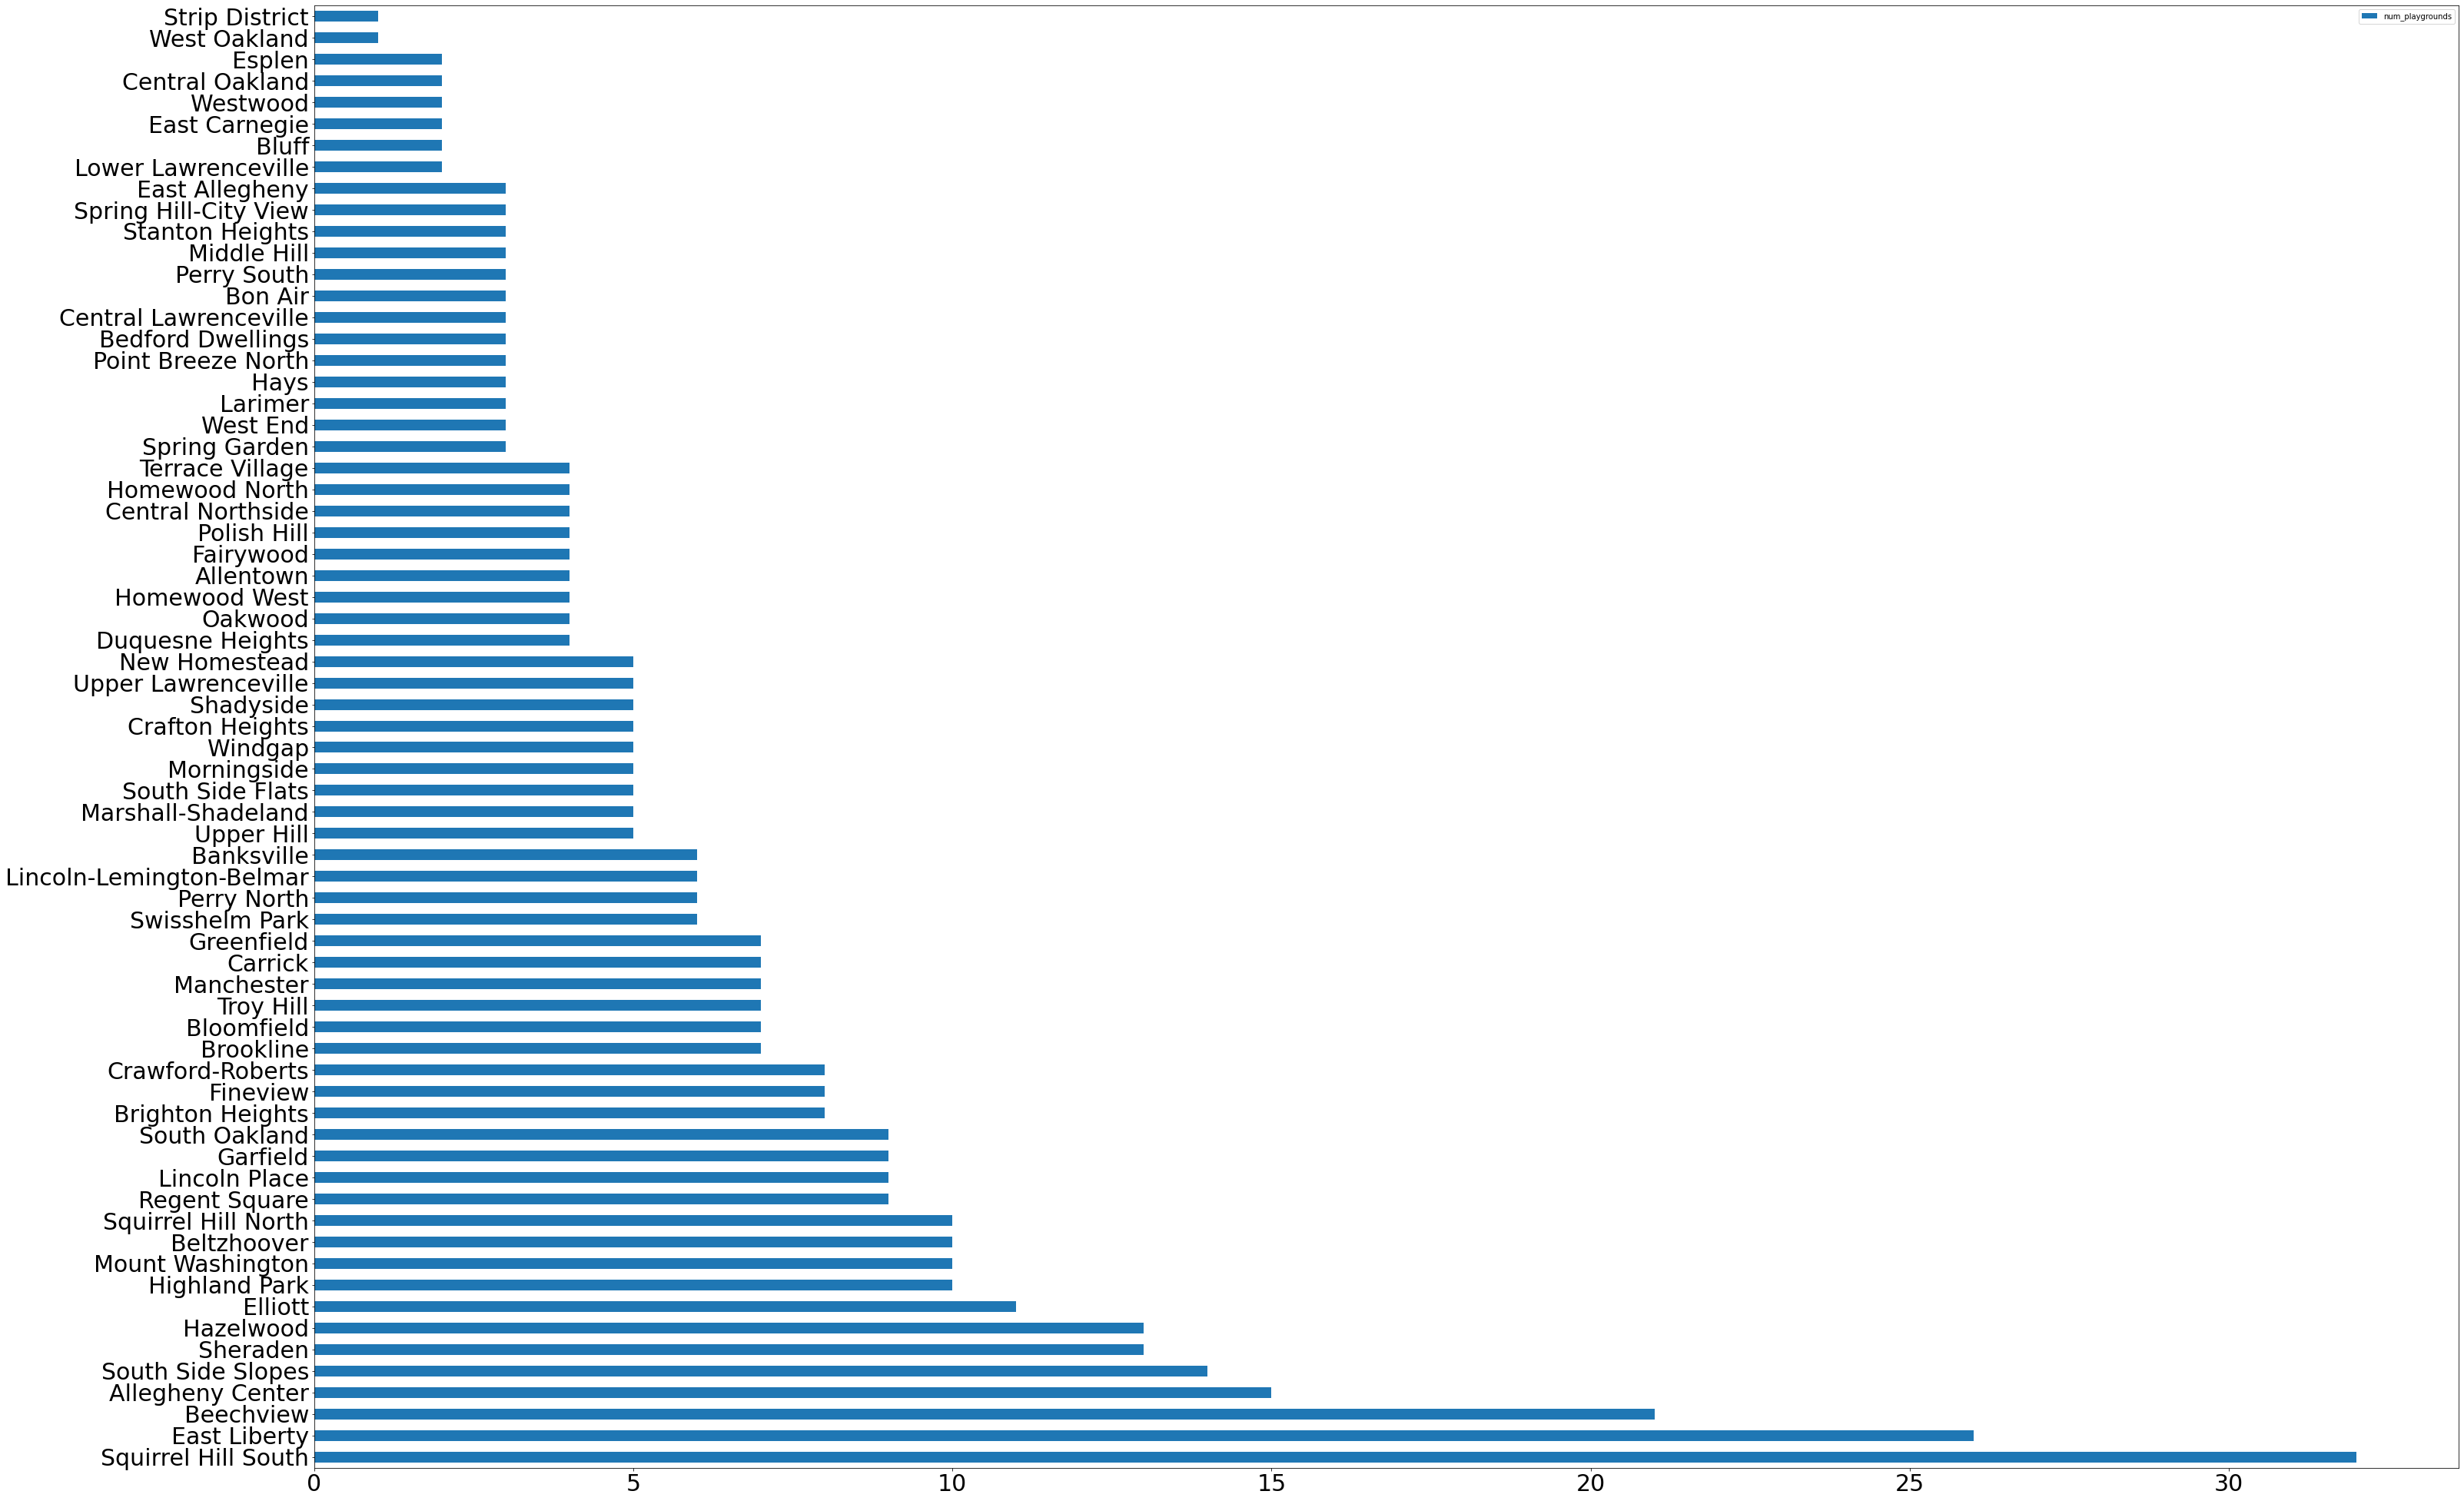

In [21]:
playgrounds.plot.barh(figsize=(50,35), fontsize=30)

According to this ana

## Visualizing on Map

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,shape_ar_1,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,7.843108e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,1.390463e+07,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,5.999801e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,7.202139e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,1.694785e+07,15,Andrea Lavin Kossis,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


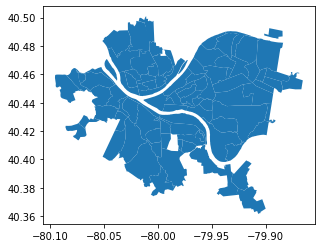

In [22]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe
neighborhoods.head()

In [25]:
# do the merge
playgrounds_map = neighborhoods.merge(playgrounds, how='left', left_on='hood', right_on='num_playgrounds')
# look at the head to confirm it merged correctly
playgrounds_map[['hood','num_playgrounds','geometry']].head()

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat